In [76]:
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.applications.vgg16 import preprocess_input, VGG16
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
%matplotlib tk
from PIL import Image
from IPython import display as ds

In [77]:
model = keras.models.load_model("C:/Users/acer/FINAL.h5")
# model.summary()

In [79]:
vgg16 = VGG16(weights='imagenet', include_top=False)

In [80]:
def predict(path):
    th = 0.5
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize the pixel values
    img = np.expand_dims(img, axis=0)
    img_feature = vgg16.predict(img)
    n_samples = img_feature.shape[0]
    img_feature_flat = np.reshape(img_feature, (n_samples, -1))
    preds = model.predict(img_feature_flat)[0]
    if(preds[0]<0.5):
        return 'Person Like Detected'
    else:
        return 'Person detected'

In [81]:
# predict("D:\\pedes\\Test\\Test\\JPEGImages\\image (172).jpg")

In [82]:
from ipyfilechooser import FileChooser
import os

In [83]:
fc = FileChooser()

In [84]:
def callBtn():
    display(fc)

In [85]:
callBtn()

FileChooser(path='C:\Users\acer', filename='', title='', show_hidden=False, select_desc='Select', change_desc=…

1/1 [==============================] - 0s 53ms/step
Person detected


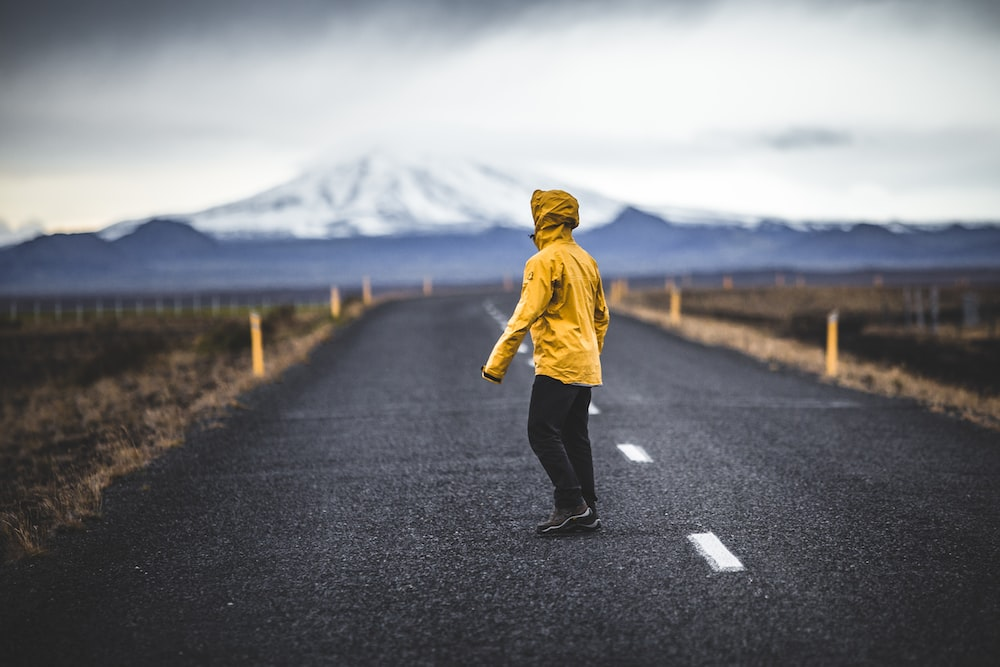

In [87]:
print(predict(fc.selected))
ds.Image(fc.selected, width=300, height=200)